In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('water_potability.csv')

In [10]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data Analysis

In [11]:
df.shape

(3276, 10)

In [12]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [15]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [16]:
df.fillna(df.mean(),inplace=True)

df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [18]:
 df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

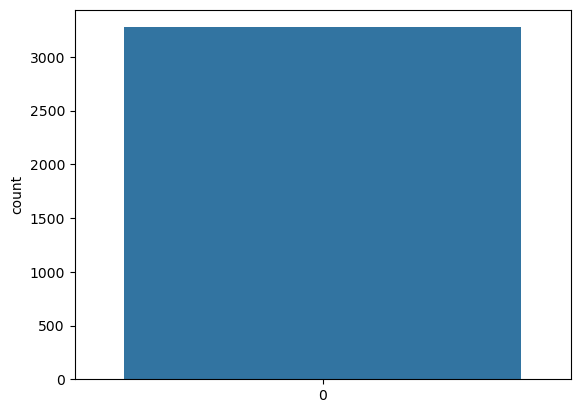

In [19]:
sns.countplot(df['Potability'])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


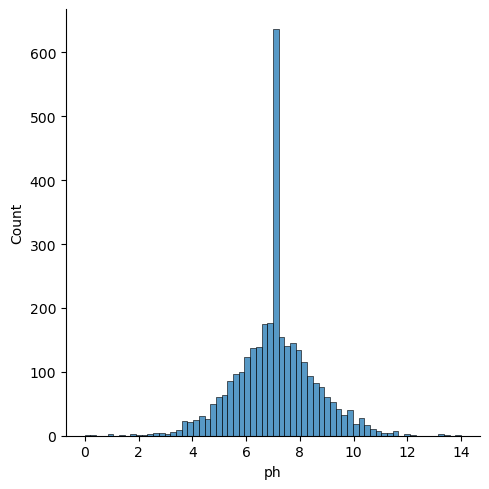

In [20]:
sns.displot(df['ph'])
plt.show()

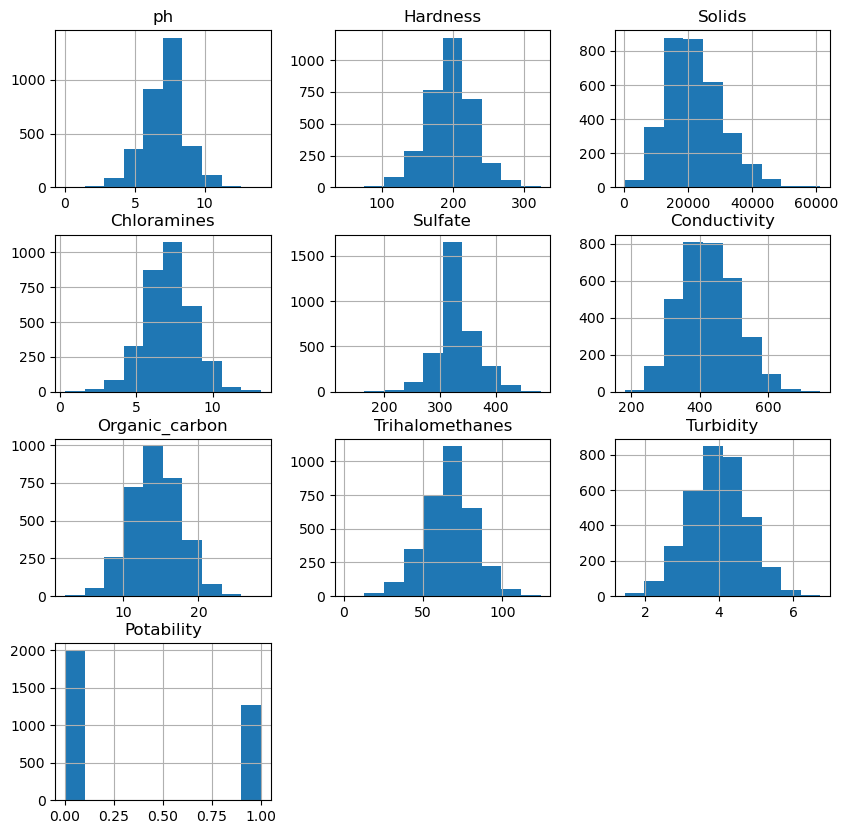

In [34]:
df.hist(figsize=(10,10))
plt.show()

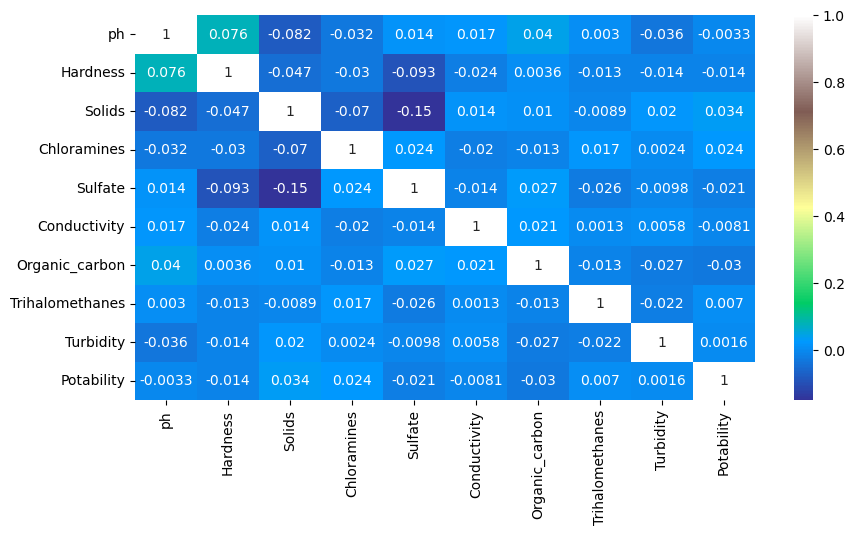

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

<Axes: >

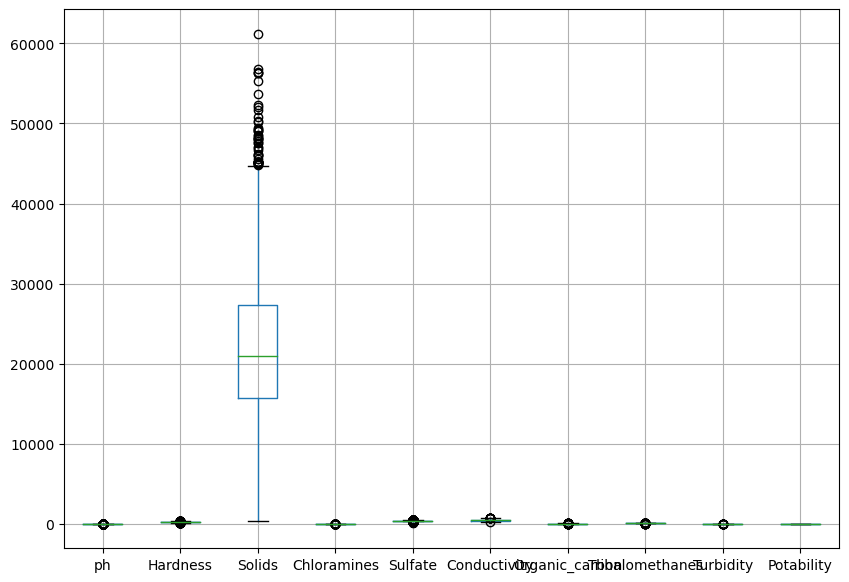

In [69]:
df.boxplot(figsize=(1,7))

In [26]:
x=df.drop('Potability',axis=1)
y=df['Potability']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)


# Train Decision Tree Classifier and cheak accuracy

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion='gini',min_samples_split=10,splitter='best')
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=10)

In [43]:
prediction=dt.predict(x_test)
print(f"Accuracy score={accuracy_score(y_test,prediction)*100}")
print(f"confusion matrix=\n {confusion_matrix(y_test,prediction)}")
print(f"Classification report =\n{classification_report(y_test,prediction)}")

Accuracy score=61.58536585365854
confusion matrix=
 [[267 106]
 [146 137]]
Classification report =
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       373
           1       0.56      0.48      0.52       283

    accuracy                           0.62       656
   macro avg       0.61      0.60      0.60       656
weighted avg       0.61      0.62      0.61       656



In [46]:
res=dt.predict([[5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])[0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [47]:
res

0

# Apply Hyper Parameter Tuning

In [65]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
#define mode is paratmeters
model=DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best','random']
min_samples_split=[2,4,6,8,10,12,14]
# define grid search
grid=dict(splitter=splitter,criterion=criterion,min_samples_split=min_samples_split)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search_dt=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,cv=cv,
                            scoring='accuracy',error_score=0)
grid_search_dt.fit(x_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')